# Spotify Song Preference Recommendation
I have a dataset representing a Spotify user's liked and disliked songs, stored as a CSV file
containing various song features such as liveliness, acoustics, and energy. My goal is to
predict whether a given set of song features indicates the user's preference for the song,
using logistic regression.



Firt I will import two basic libraries that we studied during the lectures.

In [1]:
import pandas as pd
import numpy as np

Now, I will load my CSV file and retrieve the first 3 rows of the DataFrame.

In [3]:
df = pd.read_csv('data.csv')
df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0


Now, we will check for missing (NaN) values in the columns of the dataframe.

# Data Features

I have taken my dataset from Kaggle. Here is the link for the dataset - 

[Spotify Recommendation Dataset](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

From Spotify's API documentation, the dataset contains the following features for the songs:

1. **Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

2. **Danceability:** Describes how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable, and 1.0 is most danceable.

3. **Duration_ms:** The duration of the track in milliseconds.

4. **Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

5. **Instrumentalness:** Predicts whether a track contains no vocals. The closer the value is to 1.0, the greater likelihood the track contains no vocal content.

6. **Key:** The key the track is in. Integers map to pitches using standard Pitch Class notation.

7. **Liveness:** Detects the presence of an audience in the recording. Higher values represent an increased probability that the track was performed live.

8. **Loudness:** The overall loudness of a track in decibels (dB).

9. **Mode:** Mode indicates the modality (major or minor) of a track, with major represented by 1 and minor by 0.

10. **Speechiness:** Detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words.

11. **Tempo:** The overall estimated tempo of a track in beats per minute (BPM).

12. **Time_signature:** An estimated overall time signature of a track.

13. **Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

And the variable that has to be predicted:

**Liked:** 1 for liked songs, 0 for disliked songs.


In [4]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [5]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

We can observe that dataframe does not contain any null or Nan values

Now, we can check the number of rows and columns of the dataframe and get the information about its columns

In [6]:
df.shape

(195, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


Now, we can  generates descriptive statistics to know the central tendency, dispersion, and shape of a dataset.

In [8]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


# 1. Exploratory Data Analysis

### 1.1 Histograms
We can create histograms by inputting a column name into a function, which uses matplotlib to visually represent the distribution of values in that particular column of the dataset. The function is then executed for each feature in the "features" list through a for loop, resulting in a set of histograms displayed for each individual feature. The primary goal of this code is to visually convey the distribution patterns of various features in the dataset, facilitating the detection of meaningful trends that can be beneficial for modeling and analysis.

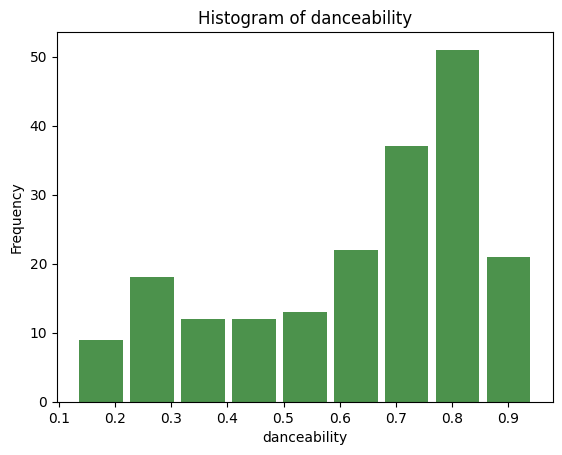

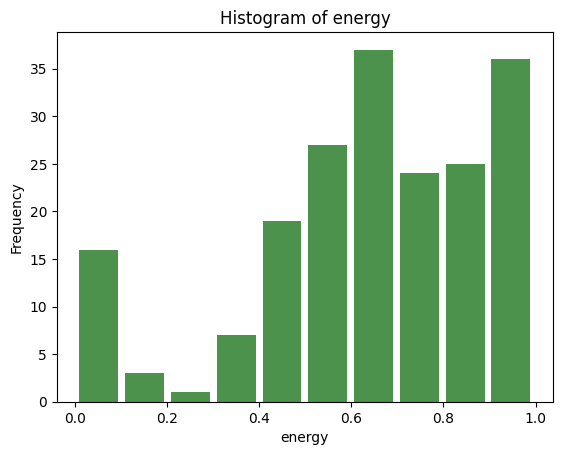

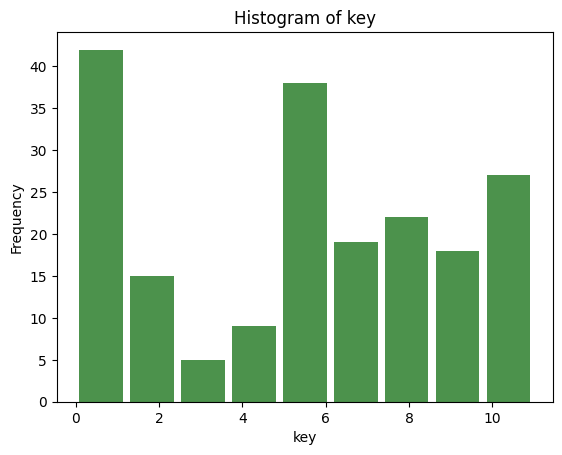

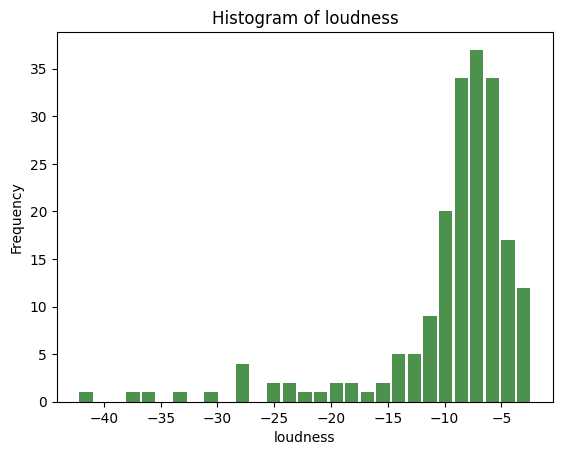

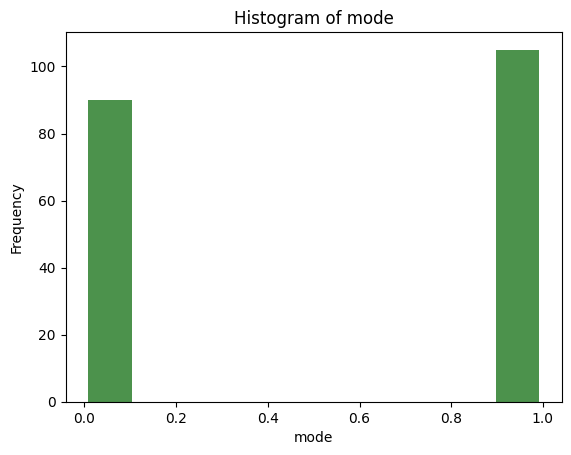

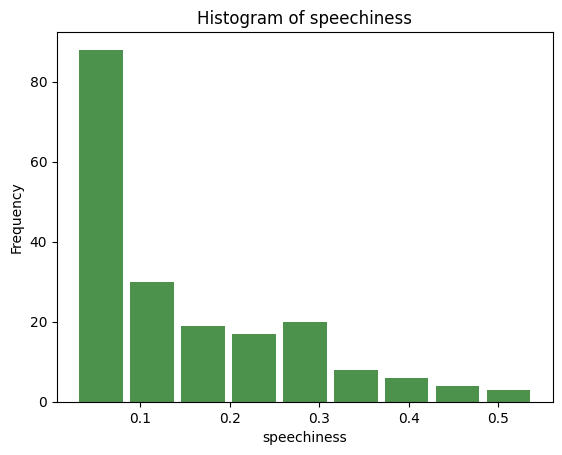

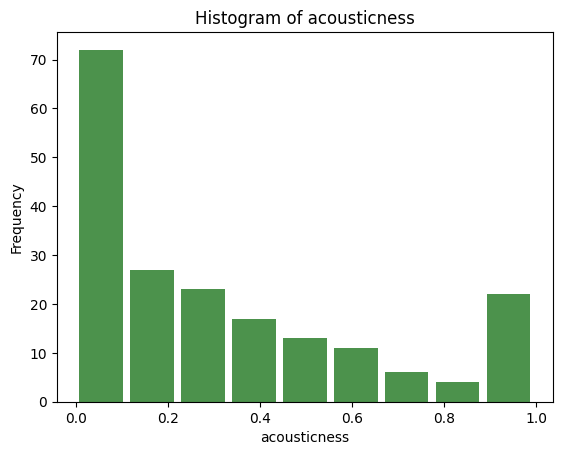

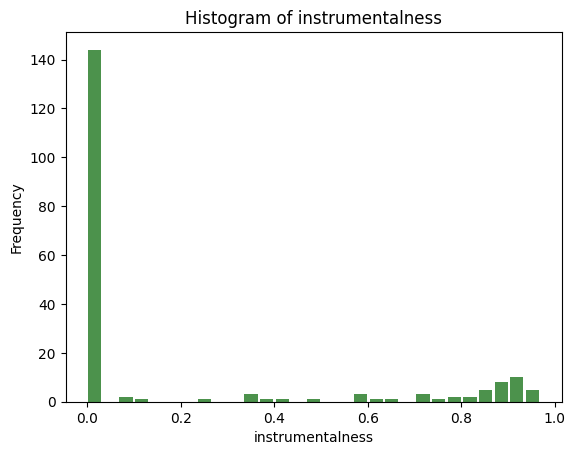

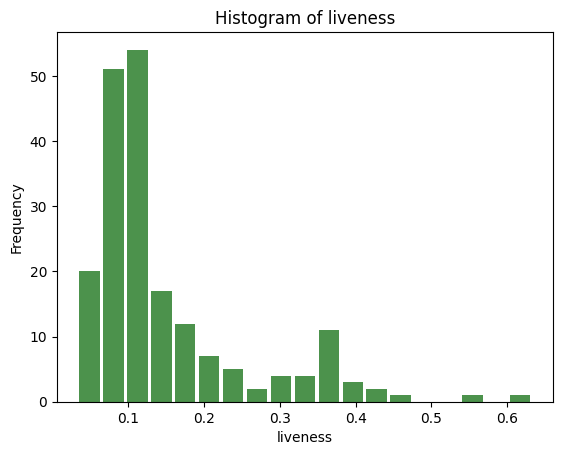

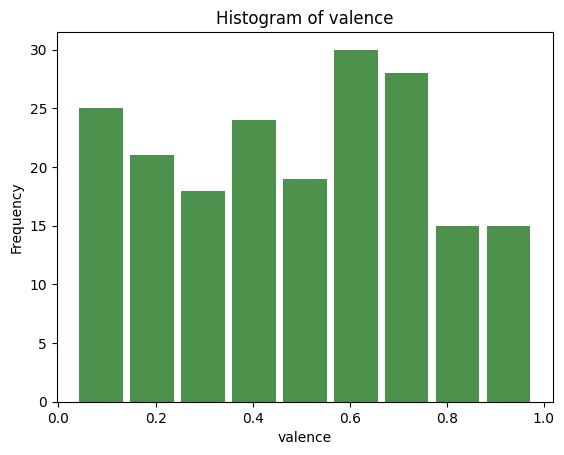

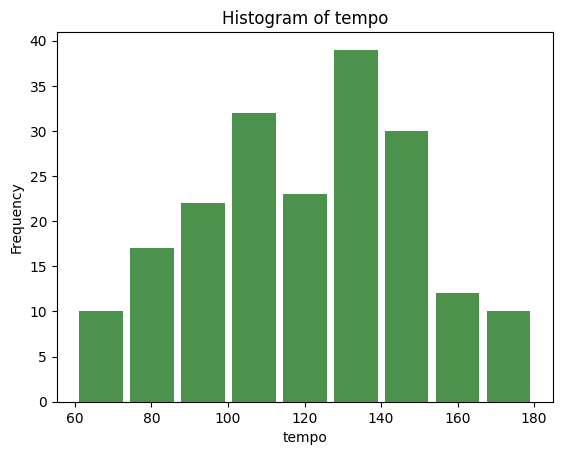

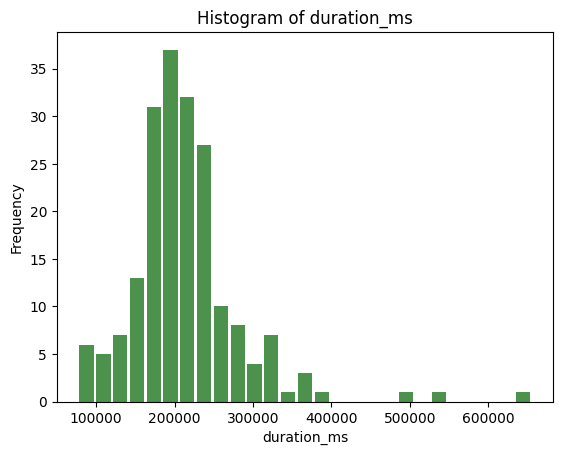

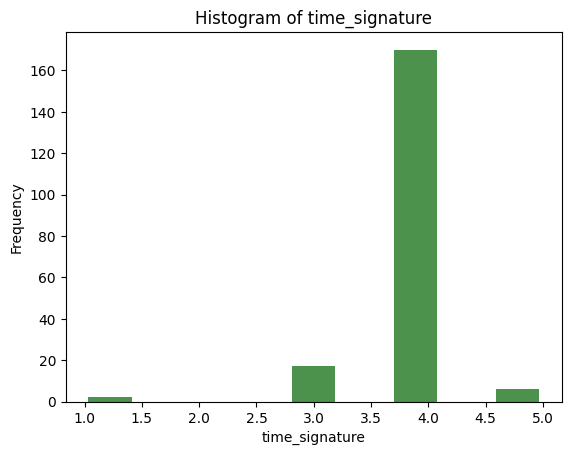

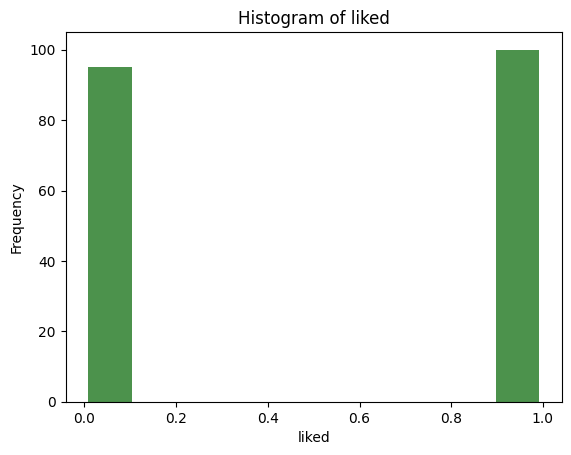

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def DrawHistogram(column_data, column_name):
    plt.hist(column_data, bins='auto', color='darkgreen', alpha=0.7, rwidth=0.85)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()


features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature', 'liked']

for feature in features:
    DrawHistogram(df[feature], feature)

### 1.2 Like vs Dislike count

We will create a countplot to analyze the percentage of liked songs by the user. 

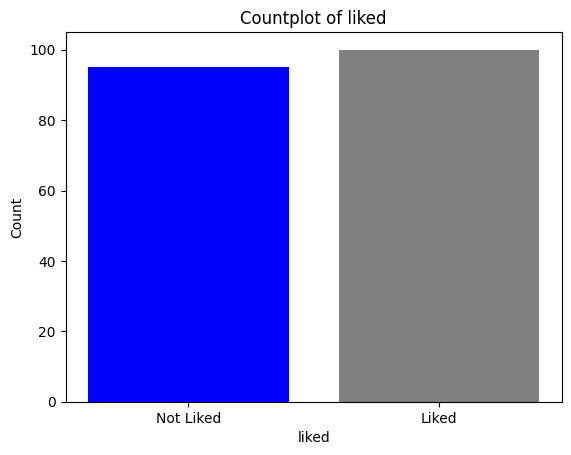

In [8]:
column_name = 'liked'
value_counts = df[column_name].value_counts()

colors = ['grey', 'blue']  # Specify colors for each category

plt.bar(value_counts.index, value_counts, color=colors)
plt.title(f'Countplot of {column_name}')
plt.xticks(value_counts.index, ['Liked', 'Not Liked'])
plt.xlabel(column_name)
plt.ylabel('Count')
plt.show()

In [9]:
print(value_counts)

liked
1    100
0     95
Name: count, dtype: int64


We have 100 liked songs and 95 songs that are not liked by the user

### 1.2 Co-relation matrix

We'll now explore the relationships between song features. I'll create a heatmap illustrating the correlation coefficient between each pair of features. Correlation coefficients range from -1, indicating a perfectly inverse or negative relationship, to 1, signifying a perfectly positive correlation. Values near zero suggest either no linear relationship or a very weak correlation between features. The diagonal line in the matrix always holds a value of 1, representing the correlation between a feature and itself. This heatmap visualization of the correlation matrix uses brighter colors for high correlation coefficients and darker colors for low or negative correlation coefficients.

This correlation matrix will provide insights into which features most significantly influence a user's preference for a song.

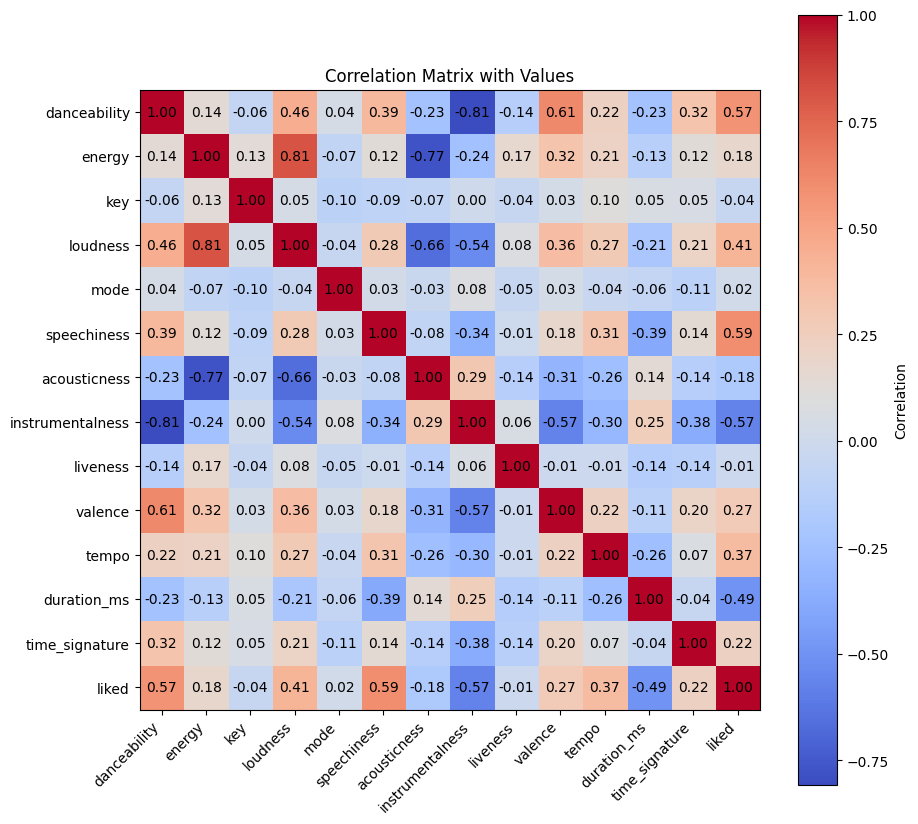

In [10]:
correlation_matrix = df.corr()


fig, ax = plt.subplots(figsize=(10,10))
heatmap = ax.matshow(correlation_matrix, cmap='coolwarm')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        ax.text(i, j, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', fontsize=10, color='black')


fig.colorbar(heatmap, label='Correlation')


ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)


ax.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=45, ha='right')



plt.title('Correlation Matrix with Values')


plt.show()

After analyzing the correlation between all features and the target column 'Liked,' we can observe that the user exhibits a preference for songs with:

1. High scores in danceability, loudness, and speechiness
2. Low scores in instrumentalness and duration

##### 1.2.1 Relationship of liked songs with danceability and speechiness
Now, we will try to see the relationship of liked songs with danceability and speechiness

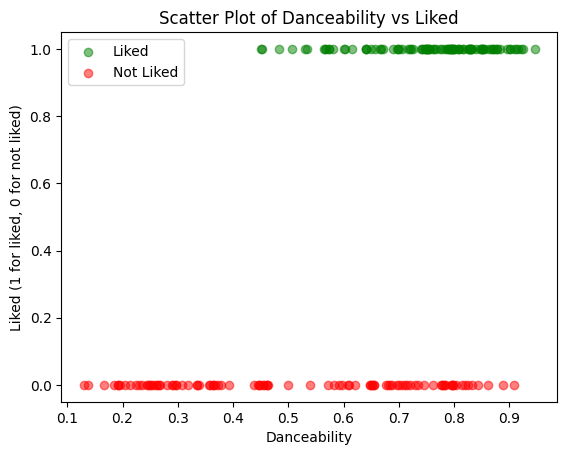

In [11]:


liked_songs = df[df['liked'] == 1]
not_liked_songs = df[df['liked'] == 0]


plt.scatter(liked_songs['danceability'], liked_songs['liked'], color='green', label='Liked', alpha=0.5)
plt.scatter(not_liked_songs['danceability'], not_liked_songs['liked'], color='red', label='Not Liked', alpha=0.5)


plt.title('Scatter Plot of Danceability vs Liked')
plt.xlabel('Danceability')
plt.ylabel('Liked (1 for liked, 0 for not liked)')
plt.legend()


plt.show()


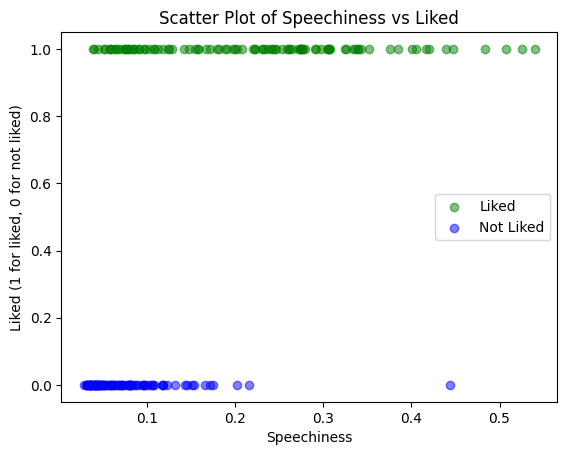

In [12]:

plt.scatter(liked_songs['speechiness'], liked_songs['liked'], color='green', label='Liked', alpha=0.5)
plt.scatter(not_liked_songs['speechiness'], not_liked_songs['liked'], color='blue', label='Not Liked', alpha=0.5)


plt.title('Scatter Plot of Speechiness vs Liked')
plt.xlabel('Speechiness')
plt.ylabel('Liked (1 for liked, 0 for not liked)')
plt.legend()


plt.show()

We can observe that speechiness has positive relation with liked songs but songs with even low speechiness are liked by the user. Therefore, we cannot affirm that a song's low score in speechiness guarantees the user's dislike. In order to get a better picture, we can do a countplot combining both the features.

<Axes: title={'center': 'Distribution of likes among songs with high speechiness and danceability'}, ylabel='count'>

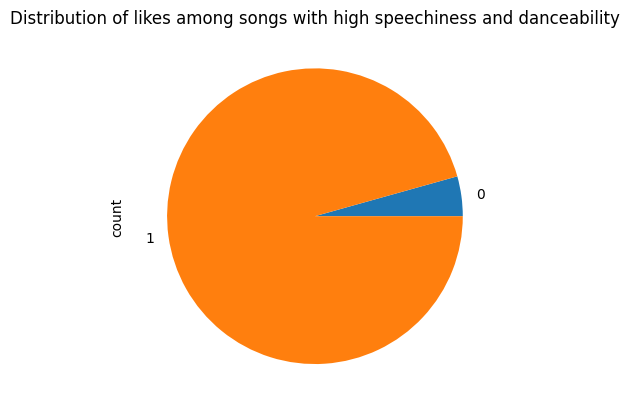

In [13]:
high_speechiness = df['speechiness'] > 0.3 
high_danceability = df['danceability'] > 0.6

songs_with_high_dance_and_speech = df[high_speechiness & high_danceability]
plt.title("Distribution of likes among songs with high speechiness and danceability")
songs_with_high_dance_and_speech['liked'].value_counts().sort_values().plot(kind = 'pie')

In [14]:
songs_with_high_dance_and_speech['liked'].value_counts()

liked
1    22
0     1
Name: count, dtype: int64

It appears that songs with high scores in both speechiness and danceability are highly probable to be favored by the user.

##### 1.2.1 Relationship of liked songs with instrumentalness and duration
Now, we will try to see the relationship of liked songs with instrumentalness and duration

In [15]:
l1=(liked_songs['duration_ms'].mean())/60000
print("Average duration of liked songs is ",l1,"minutes")
print("Average duration of not liked songs is ",(not_liked_songs['duration_ms'].mean())/60000,"minutes")


Average duration of liked songs is  2.9832048333333336 minutes
Average duration of not liked songs is  4.160616315789474 minutes


We can see that the average duration of liked songs is below 3 minutes, while the average duration of disliked songs exceeds 4 minutes. Typically, songs with higher instrumentalness tend to have longer durations. This implies that the user leans towards songs with fewer instrumental elements, favoring shorter compositions.

In [16]:
liked_songs['duration_ms'].mean()

178992.29

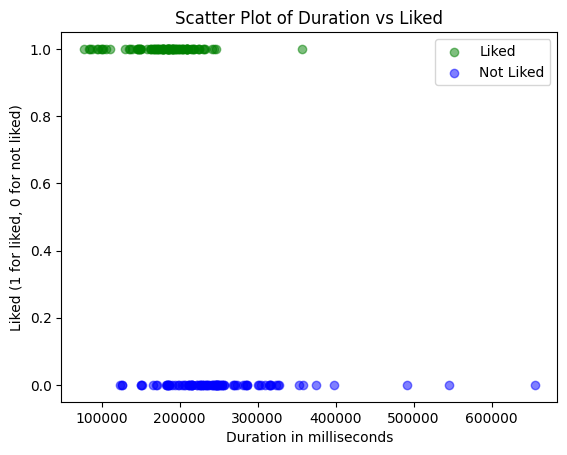

In [17]:
plt.scatter(liked_songs['duration_ms'], liked_songs['liked'], color='green', label='Liked', alpha=0.5)
plt.scatter(not_liked_songs['duration_ms'], not_liked_songs['liked'], color='blue', label='Not Liked', alpha=0.5)


plt.title('Scatter Plot of Duration vs Liked')
plt.xlabel('Duration in milliseconds')
plt.ylabel('Liked (1 for liked, 0 for not liked)')
plt.legend()


plt.show()

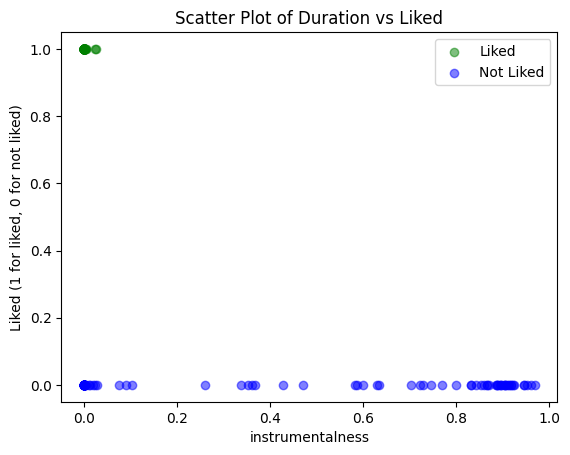

In [18]:
plt.scatter(liked_songs['instrumentalness'], liked_songs['liked'], color='green', label='Liked', alpha=0.5)
plt.scatter(not_liked_songs['instrumentalness'], not_liked_songs['liked'], color='blue', label='Not Liked', alpha=0.5)


plt.title('Scatter Plot of Duration vs Liked')
plt.xlabel('instrumentalness')
plt.ylabel('Liked (1 for liked, 0 for not liked)')
plt.legend()


plt.show()

# 2.)  KMeans Clustering

I aim to group similar songs in the dataset into clusters and visualize the count of songs within each cluster. Subsequently, I plan to assign names to these clusters based on the average danceability, speechiness, duration and energy values specific to each cluster.

Here is the class KMeans that uses only Numpy and Pandas

In [53]:
import matplotlib.pyplot as plt
import numpy as np




def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:

    def __init__(self, K=3, n_iters=1000,epsilon=1e-5):
        self.K = K
        self.n_iters = n_iters
        self.epsilon=epsilon
        self.clusters_list = [[] for _ in range(self.K)]
        
        self.centroids_list = []

    def predict(self, X):
        self.X = X
        self.n_rows, self.n_cols = X.shape

        
        random_sample_idxs = np.random.choice(self.n_rows, self.K, replace=False)
        self.centroids_list = [self.X[idx] for idx in random_sample_idxs]

        
        for _ in range(self.n_iters):
            
            

            
                for idx, sample in enumerate(self.X):
                        distances = [euclidean_distance(sample, point) for point in self.centroids_list]
                        closest_index = np.argmin(distances)
                        self.clusters_list[closest_index].append(idx)
                

                # Calculate new centroids from the clusters
                centroids_old = self.centroids_list
                
                self.centroids_list = np.zeros((self.K, self.n_cols))
                for cluster_idx, cluster in enumerate(self.clusters_list):
                    cluster_mean = np.mean(self.X[cluster], axis=0)
                    self.centroids_list[cluster_idx] = cluster_mean
        

                distances1 = [
                euclidean_distance(centroids_old[i], self.centroids_list[i]) for i in range(self.K)]
                

                
                if sum(distances1) < self.epsilon:
                    break

            
        labels = np.empty(self.n_rows)

        for cluster_idx, cluster in enumerate(self.clusters_list):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        
        return labels
    

Now, I will create a numpy array of the dataframe ' df ' to proceed further.

In [54]:
type(df)

pandas.core.frame.DataFrame

In [55]:
df_array = df.values
type(df_array)

numpy.ndarray

In [56]:
df_array.shape

(195, 15)

#### 2.1 Standardizing data

First, I will convert the data entries to float to perform the calculations properly. I'll proceed with standardizing the data. For that, I will compute the mean and standard deviation for each row in the array, ensuring proper broadcasting of arrays with the use of the keepdims=True argument. The next step involves subtracting the row means from each element in the array and then dividing the outcome by the corresponding row standard deviation. This is done to make features comparable by giving them a common scale.

In [57]:
import numpy as np

df_array = df_array.astype(float)

# Calculate mean and standard deviation for each row
row_means = np.mean(df_array, axis=1, keepdims=True)
row_stds = np.std(df_array, axis=1, keepdims=True)

# Standardize each row
standardized_data = (df_array - row_means) / row_stds



I will make three clusters of the data.

In [58]:
k1 = KMeans()
y_pred1 = k1.predict(df_array)

In [59]:
print(y_pred1)
y_pred1.shape

[1. 2. 2. 2. 0. 2. 0. 0. 2. 0. 0. 2. 0. 2. 0. 2. 0. 1. 2. 0. 0. 2. 2. 0.
 2. 2. 2. 2. 0. 0. 0. 2. 2. 0. 0. 0. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 2. 0. 0. 0. 1. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 0. 0. 2.
 2. 2. 2. 2. 2. 0. 0. 2. 0. 2. 0. 0. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2.
 2. 2. 2. 1. 2. 0. 0. 1. 0. 2. 2. 0. 2. 0. 2. 2. 2. 1. 2. 2. 1. 1. 0. 2.
 2. 2. 2. 2. 0. 0. 0. 2. 2. 0. 2. 2. 0. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 1. 0. 0. 0. 2. 2. 2. 0. 1.
 1. 0. 0. 0. 0. 2. 0. 2. 1. 2. 0. 2. 2. 2. 2. 2. 1. 1. 0. 2. 0. 2. 2. 2.
 2. 2. 0.]


(195,)

'ypred1' assigns each song the cluster number and now I will add a column name "Cluster" to that dataframe to identify which song belongs to which cluster.

In [60]:
df['Cluster'] = y_pred1

I will convert these entries from integer to float

In [61]:
y_pred1=y_pred1.astype(int)
y_pred1

array([1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0])

We can get the information about each feature of each cluster.

In [62]:
cluster_stats = df.groupby('Cluster').describe()

# Display the descriptive statistics
print(cluster_stats)

        danceability                                                      \
               count      mean       std    min     25%     50%      75%   
Cluster                                                                    
0.0             62.0  0.690419  0.212044  0.191  0.6220  0.7545  0.84350   
1.0             19.0  0.560579  0.237251  0.191  0.3075  0.5920  0.77100   
2.0            114.0  0.620096  0.210907  0.130  0.4545  0.6820  0.79625   

               energy            ... time_signature       liked            \
           max  count      mean  ...            75%  max  count      mean   
Cluster                          ...                                        
0.0      0.946   62.0  0.633787  ...            4.0  5.0   62.0  0.790323   
1.0      0.901   19.0  0.448911  ...            4.0  4.0   19.0  0.052632   
2.0      0.924  114.0  0.672544  ...            4.0  5.0  114.0  0.438596   

                                            
              std  min  25%  50%  7

Now, I have the clusters and I want to assign names to these clusters based on their features. Considering danceability, speechiness, energy, and duration as important features, I will compute the mean values for these features within each cluster and assign appropriate names. Then, I plan to visualize these clusters using a countplot to gain insights into their distribution.

First, I will convert the values in the columns to numeric type. Then, I will calculate the mean of the each feature for Cluster 0, 1 and 2. For that, I will filter the DataFrame to include only rows where the 'Cluster' column is equal to that particular cluster number, then select the values from the desired fature column for which I want to calculate mean , and finally computes the mean of those values.

In [63]:
# For 'Danceability'

df['danceability'] = pd.to_numeric(df['danceability'])

# Calculate the mean of 'danceability' for Cluster 0
danceability_mean_cluster_0 = df[df['Cluster'] == 0]['danceability'].mean()

print(f"Mean danceability for Cluster 0: {danceability_mean_cluster_0}")
danceability_mean_cluster_1 = df[df['Cluster'] == 1]['danceability'].mean()

print(f"Mean danceability for Cluster 1: {danceability_mean_cluster_1}")
danceability_mean_cluster_2 = df[df['Cluster'] == 2]['danceability'].mean()

print(f"Mean danceability for Cluster 2: {danceability_mean_cluster_2}")

Mean danceability for Cluster 0: 0.6904193548387098
Mean danceability for Cluster 1: 0.5605789473684212
Mean danceability for Cluster 2: 0.6200964912280701


In [64]:

# For 'ENERGY'

df['energy'] = pd.to_numeric(df['energy'])


energy_mean_cluster_0 = df[df['Cluster'] == 0]['energy'].mean()

print(f"Mean energy for Cluster 0: {energy_mean_cluster_0}")
energy_mean_cluster_1 = df[df['Cluster'] == 1]['energy'].mean()

print(f"Mean energy for Cluster 1: {energy_mean_cluster_1}")
energy_mean_cluster_2 = df[df['Cluster'] == 2]['energy'].mean()

print(f"Mean energy for Cluster 2: {energy_mean_cluster_2}")


Mean energy for Cluster 0: 0.6337870967741933
Mean energy for Cluster 1: 0.44891052631578954
Mean energy for Cluster 2: 0.6725442105263157


In [65]:
#For 'SPEECHINESS'

df['speechiness'] = pd.to_numeric(df['speechiness'])

# Calculate the mean of 'danceability' for Cluster 0
speechiness_mean_cluster_0 = df[df['Cluster'] == 0]['speechiness'].mean()

print(f"Mean speechiness for Cluster 0: {speechiness_mean_cluster_0}")

speechiness_mean_cluster_1 = df[df['Cluster'] == 1]['speechiness'].mean()

print(f"Mean speechiness for Cluster 1: {speechiness_mean_cluster_1}")
speechiness_mean_cluster_2 = df[df['Cluster'] == 2]['speechiness'].mean()

print(f"Mean speechiness for Cluster 2: {speechiness_mean_cluster_2}")

Mean speechiness for Cluster 0: 0.2105790322580645
Mean speechiness for Cluster 1: 0.06813684210526316
Mean speechiness for Cluster 2: 0.12891403508771931


In [66]:
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')

# Calculate the mean of 'danceability' for Cluster 0
duration_mean_cluster_0 = df[df['Cluster'] == 0]['duration_ms'].mean()

print(f"Mean duration for Cluster 0: {duration_mean_cluster_0}")

duration_mean_cluster_1 = df[df['Cluster'] == 1]['duration_ms'].mean()

print(f"Mean duration for Cluster 1: {duration_mean_cluster_1}")
duration_mean_cluster_2 = df[df['Cluster'] == 2]['duration_ms'].mean()

print(f"Mean duration for Cluster 2: {duration_mean_cluster_2}")

Mean duration for Cluster 0: 150613.5806451613
Mean duration for Cluster 1: 367816.7894736842
Mean duration for Cluster 2: 221826.14912280702



We can make a table to see all the values

In [67]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [68]:
# import module
from tabulate import tabulate

# assign data
mydata = [
	["ENERGY", energy_mean_cluster_0,energy_mean_cluster_1,energy_mean_cluster_2], 
	["DANCEABILITY", danceability_mean_cluster_0,danceability_mean_cluster_1,danceability_mean_cluster_2], 
	["SPEECHINESS", speechiness_mean_cluster_0,speechiness_mean_cluster_1,speechiness_mean_cluster_2], 
	["DURATION", duration_mean_cluster_0,duration_mean_cluster_1,duration_mean_cluster_2]
]

# create header
head = ["Cluster 0", "Cluster 1",'Cluster 2']

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))


+--------------+---------------+----------------+---------------+
|              |     Cluster 0 |      Cluster 1 |     Cluster 2 |
+==============+===============+================+===============+
| ENERGY       |      0.633787 |      0.448911  |      0.672544 |
+--------------+---------------+----------------+---------------+
| DANCEABILITY |      0.690419 |      0.560579  |      0.620096 |
+--------------+---------------+----------------+---------------+
| SPEECHINESS  |      0.210579 |      0.0681368 |      0.128914 |
+--------------+---------------+----------------+---------------+
| DURATION     | 150614        | 367817         | 221826        |
+--------------+---------------+----------------+---------------+


We observe that cluster 1 exhibits the lowest danceability, energy, and speechiness among the three clusters. Additionally, it boasts the highest mean duration, typically associated with relaxed songs. Therefore, we can label cluster 1 as "Relaxed Melodies."

Cluster 0 stands out with the highest energy, speechiness, and danceability, accompanied by the lowest duration. These characteristics are often found in dance songs. Accordingly, we can name cluster 0 as "Dynamic and Energetic Tracks."

Cluster 2 displays moderate values in energy (close to cluster 1), danceability, speechiness, and duration. As a result, we can assign the name "Upbeat Songs" to this cluster.

#### 2.2 Count plot for the clusters

Now, we will count the number of songs in each cluster.

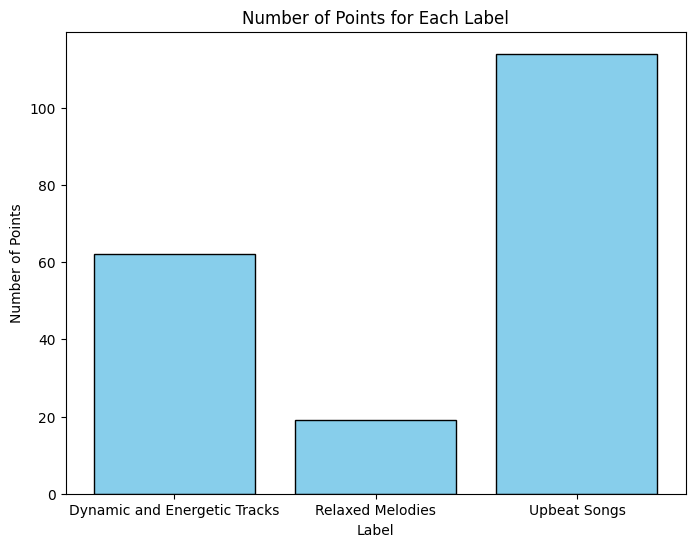

In [69]:

# Map cluster labels to corresponding names
cluster_names = {0: 'Dynamic and Energetic Tracks', 1: 'Relaxed Melodies', 2: 'Upbeat Songs'}
label_names = np.array([cluster_names[label] for label in y_pred1])

# Count the number of data points corresponding to each label
label_counts = np.bincount(y_pred1)

# Plot histogram of label counts
plt.figure(figsize=(8, 6))
plt.bar(range(len(label_counts)), label_counts, color='skyblue', edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Number of Points')
plt.title('Number of Points for Each Label')

# Add cluster names to the x-axis ticks
plt.xticks(range(len(cluster_names)), [cluster_names[i] for i in range(len(cluster_names))])

plt.show()


In [70]:
label_counts

array([ 62,  19, 114], dtype=int64)

We can see that dataset has -  
\
Relaxed Melodies             -19\
Dynamic and Energetic Tracks - 62 \
Upbeat Songs                 - 114

Now, I want to caculate percentage of liked songs in each cluster.

In [71]:
liked_counts = df.groupby('Cluster')['liked'].sum()

print(liked_counts)

Cluster
0.0    49
1.0     1
2.0    50
Name: liked, dtype: int64


In [72]:
liked_counts=liked_counts.values

In [73]:
percent_liked_cluster_0=(liked_counts[0]/label_counts[0])*100
percent_liked_cluster_1=(liked_counts[1]/label_counts[1])*100
percent_liked_cluster_2=(liked_counts[2]/label_counts[2])*100

print("Percentage of Liked Songs in Cluster 0 : ", percent_liked_cluster_0)
print("Percentage of Liked Songs in Cluster 1 : ", percent_liked_cluster_1)
print("Percentage of Liked Songs in Cluster 2 : ", percent_liked_cluster_2)

Percentage of Liked Songs in Cluster 0 :  79.03225806451613
Percentage of Liked Songs in Cluster 1 :  5.263157894736842
Percentage of Liked Songs in Cluster 2 :  43.859649122807014


We can see that user the user prefers the songs with higher energy and dynamism. Now, I want to find based on given song features, whether the user will express liking toward the song.For that, I will use Logistic Regression.

# 3.) Logistic Regression

Logistic Regression is one of the most popular statistical models which is used for classification. It comes under a supervised machine learning model, which learns from the labeled data (i.e. given input and output for training). Logisitc Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability that an instance is greater than 50%, then the model predicts that the instance belongs to that class 1, or else it predicts that it belongs to class 0. This makes it a binary classifier. I will use Logistic Regression to indicating whether or not a particular song will be liked by the user given its features. 

First, I will define my class for Logistic Regression. First, I will define the sigmoid function transforms linear predictions into probabilities, and the LogisticRegression class includes methods for training the model (fit) and making predictions (predict). The training process involves adjusting weights and bias using gradient descent to minimize prediction errors. The model is initialized with a learning rate (lr) and number of iterations(n_iters).

In [15]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, epsilon=1e-5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.epsilon = epsilon
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, X, y):
        linear_prediction = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_prediction)
        loss = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
        return np.mean(loss)

    def fit(self, X, y):
        n_rows, n_cols = X.shape
        self.weights = np.zeros(n_cols)
        self.bias = 0
        previous_cost = float('inf')

        for iteration in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            dw = (1/n_rows) * np.dot(X.T, (predictions - y))
            db = (1/n_rows) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            
            current_cost = self.log_loss(X, y)

            
            if abs(previous_cost - current_cost) < self.epsilon:
                break

            previous_cost = current_cost

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_pred)
        
        class_prediction = [1 if prediction > 0.5 else 0 for prediction in predictions]

        return class_prediction


Now, I will split my dataset into testing and training data. I will first shuffle the rows of the DataFrame randomly to ensure that the data is randomized.

In [16]:
df1 = df.sample(frac=1)
ratio = 0.8
 
total_rows = df1.shape[0]
train_size = int(total_rows*ratio)
 
train = df1[0:train_size]
test = df1[train_size:]

In [17]:
train.shape, test.shape

((156, 14), (39, 14))

Now,I will extract is specific columns from the training and testing DataFrames to create feature matrices (X_train and X_test) and target vectors (y_train and y_test). These datasets will be used to train and evaluate the Logistic regression model.

In [18]:
X_train=train[ ['danceability','energy','key','loudness','mode','speechiness','acousticness',
              	'instrumentalness',	'liveness',	'valence',	'tempo',	'duration_ms',	'time_signature']]
y_train=train['liked']
X_test=test[ ['danceability','energy','key','loudness','mode','speechiness','acousticness',
              	'instrumentalness',	'liveness',	'valence',	'tempo',	'duration_ms',	'time_signature']]
y_test=test['liked']

I will now standarize the data for training and testing.

In [19]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

Now, I will create a class to train and then predict the values for features of X_test.

In [21]:
L1=LogisticRegression()
L1.fit(X_train,y_train)
y_predict=L1.predict(X_test)

I want to check how well my model is performing i.e. how different are the predicted values from actual matrix. For that, I will do the following -

1.**Confusion Matrix** : A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. The matrix displays, the number of instances produced by the model on the test data.\
\
    true positives (TP): occurs when the model accurately predicts a positive data point.\
    true negatives (TN): occurs when the model accurately predicts a negative data point.\
    false positives (FP): occurs when the model predicts a positive data point incorrectly.\
    false negatives (FN): occurs when the model predicts a negative data point incorrectly.
\
\
2. **Accuracy** : I will define an accuracy function which will count the number of correct predictions and divide it by total number of predictions to get the accuracy as a ratio. 

### Confusion Matrix

In [22]:
def confusion_matrix(y_true, y_pred):
    """
    Compute the confusion matrix.

    Parameters:
    - y_true: Array of true labels
    - y_pred: Array of predicted labels

    Returns:
    - Confusion matrix as a dictionary
    """

    # Initialize counts to zero
    tp = fp = tn = fn = 0

    # Iterate over each pair of true and predicted labels
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == 1 and pred_label == 1:
            tp += 1
        elif true_label == 0 and pred_label == 1:
            fp += 1
        elif true_label == 0 and pred_label == 0:
            tn += 1
        elif true_label == 1 and pred_label == 0:
            fn += 1

    # Return the confusion matrix as a dictionary
    confusion_matrix_dict = {
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'True Negative (TN)': tn,
        'False Negative (FN)': fn
    }

    # Display the confusion matrix in a table form
    print("\nConfusion Matrix:")
    print(f"                  Predicted")
    print(f"                  Positive    Negative")
    print(f"Actual Positive     {tp}          {fn}")
    print(f"Actual Negative     {fp}          {tn}")

    return confusion_matrix_dict


cm = confusion_matrix(y_test,y_predict)

# Display the confusion matrix in a dictionary form
print("\nConfusion Matrix (Dictionary Form):")
for key, value in cm.items():
    print(f"{key}: {value}")



Confusion Matrix:
                  Predicted
                  Positive    Negative
Actual Positive     19          4
Actual Negative     2          14

Confusion Matrix (Dictionary Form):
True Positive (TP): 19
False Positive (FP): 2
True Negative (TN): 14
False Negative (FN): 4


### Accuracy

Accuracy will be given by -

 $$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Number of Samples}}$$


In [23]:
print("Accuracy for the Logistic Regression is ", (19+14)/(19+14+2+4))

Accuracy for the Logistic Regression is  0.8461538461538461



After evaluating the logistic regression model, the calculated accuracy is 0.84. This implies that the model correctly predicted the outcome for approximately 84% of the instances in the test set.